In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df_spam = df[df['v1']=='spam']
df_spam = df_spam[['v1','v2']]
df_spam

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [5]:
df_ham = df[df['v1'] == 'ham']
df_ham = df_ham[['v1','v2']]
df_ham

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df_spam.shape

(747, 2)

In [7]:
df_ham.shape

(4825, 2)

In [8]:
df_ham = df_ham.sample(df_spam.shape[0])

In [9]:
df_ham.shape

(747, 2)

In [10]:
df_balance = pd.concat([df_spam,df_ham])

In [11]:
df_balance.reset_index(inplace=True)

In [12]:
df_balance

,index,v1,v2
0,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,5,spam,FreeMsg Hey there darling it's been 3 week's n...
2,8,spam,WINNER!! As a valued network customer you have...
3,9,spam,Had your mobile 11 months or more? U R entitle...
4,11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...,...
1489,165,ham,I place all ur points on e cultures module alr...
1490,599,ham,I'm going out to buy mum's present ar.
1491,2684,ham,Yupz... I've oredi booked slots 4 my weekends ...
1492,2901,ham,"Bill, as in: Are there any letters for me. iÛ..."


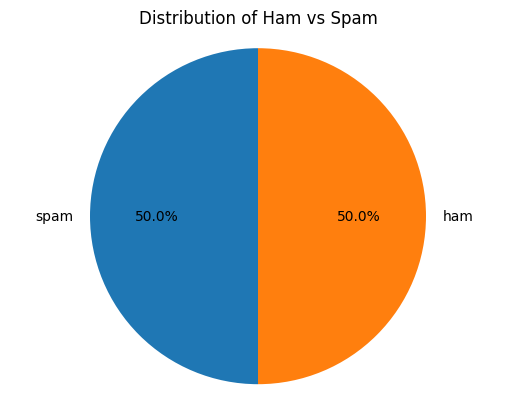

In [48]:
counts = df_balance['v1'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
_ = plt.title('Distribution of Ham vs Spam')


In [13]:
df_balance.drop(['index'],axis=1,inplace=True)

In [14]:
df_balance['spam'] = df_balance['v1'].apply(lambda x: 1 if x == 'spam' else 0)
df_balance.head()

,v1,v2,spam
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,spam,FreeMsg Hey there darling it's been 3 week's n...,1
2,spam,WINNER!! As a valued network customer you have...,1
3,spam,Had your mobile 11 months or more? U R entitle...,1
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1


In [15]:
df_balance

,v1,v2,spam
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,spam,FreeMsg Hey there darling it's been 3 week's n...,1
2,spam,WINNER!! As a valued network customer you have...,1
3,spam,Had your mobile 11 months or more? U R entitle...,1
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
1489,ham,I place all ur points on e cultures module alr...,0
1490,ham,I'm going out to buy mum's present ar.,0
1491,ham,Yupz... I've oredi booked slots 4 my weekends ...,0
1492,ham,"Bill, as in: Are there any letters for me. iÛ...",0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_balance['v2'],df_balance['spam'],test_size=0.2,random_state = 42)

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [43]:
X_test_vec

<299x3839 sparse matrix of type '<class 'numpy.float64'>'
	with 2809 stored elements in Compressed Sparse Row format>

In [25]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [26]:
model1 = MultinomialNB()
model1.fit(X_train_vec, y_train)

MultinomialNB()

In [27]:
y_pred = model.predict(X_test_vec)

In [28]:
y_pred_1 = model1.predict(X_test_vec)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
confusion_matrix(y_test, y_pred)

Accuracy: 0.9632107023411371
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       154
           1       0.97      0.95      0.96       145

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



array([[150,   4],
       [  7, 138]])

In [32]:
acc = accuracy_score(y_test, y_pred_1)
rep = classification_report(y_test, y_pred_1)

In [33]:
print(f"Accuracy: {acc}")
print(f"Classification Report:\n{rep}")
confusion_matrix(y_test, y_pred_1)

Accuracy: 0.939799331103679
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       154
           1       0.90      0.99      0.94       145

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



array([[138,  16],
       [  2, 143]])

In [37]:
model.predict(vectorizer.transform(["With reference to NSE circulars NSE/INSP/46704 dated December 17, 2020, and NSE/INSP/55039 e to NCL securities ISIN wise is attached"]))

array([0])

In [40]:
joblib.dump(model1, 'spam_model_nb.joblib')

['spam_model_nb.joblib']

In [41]:
joblib.dump(model, 'spam_model_lr.joblib')

['spam_model_lr.joblib']

In [45]:
model1.predict(vectorizer.transform(["Hello,Above is the OTP to process your account closure request. Do not share your OTP with anyone for security reasons.	 "]))

array([0])

In [55]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(X_train_vec.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation = "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
history = model.fit(X_train_vec,y_train,epochs =10)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6411 - loss: 0.6242
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9425 - loss: 0.1965
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9828 - loss: 0.0907
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0449
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0355
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9974 - loss: 0.0183
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0136
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0129
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9997 - loss: 0.0082
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0052


In [59]:
model.evaluate(X_test_vec,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9494 - loss: 0.2069  


[0.20541374385356903, 0.9598662257194519]

In [69]:
y = model.predict(vectorizer.transform(["After launching an experimental updated version of Gemini 1.5 Pro (0801) that ranked #1 on the LMSYS leaderboard, we’re introducing a series of improvements to help developers scale with our most capable and efficient models"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [70]:
if y > 0.5:
  print("spam")
else:
  print("ham")

ham
